In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams
from bs4 import BeautifulSoup
from pyquery import PyQuery as pq
from collections import defaultdict 
from imdb import IMDb
import pandas as pd
import cPickle as pickle
import io 
import time
import requests

In [2]:
BOdict = pickle.load(io.open('BOdict.p', 'rb'))

In [3]:
BOdf = pd.DataFrame(BOdict).transpose()

In [11]:
BOdf.shape

(3088, 15)

In [21]:
limiteddf = BOdf.dropna(subset=['budget', 'season', 'mpaa', 'opening'])

In [39]:
limiteddf

,budget,cast,close,director,gross,mpaa,open,opening,opening theaters,rank,rating,season,studio,title,year
0327597,60000000,None,7/2,None,75286229,"Rated PG for thematic elements, scary images, ...",2/6,16849640,2299,43,7.7,0,Focus,Coraline,2009
0337692,25000000,None,5/24,None,92476,"Rated R for strong sexual content, drug use an...",5/11,56692,50,372,6.1,0,Free,The Road,2012
0359950,91000000,None,4/10,None,58236838,"Rated PG for some crude comments, language and...",12/25,12765508,2909,60,7.4,3,Fox,The Secret Life of Walter Mitty,2013
0361748,70000000,None,12/17,None,120540719,"Rated R for strong graphic violence, language ...",8/21,38054676,3165,25,8.3,1,Wein.,Inglourious Basterds,2009
0362478,25000000,None,1/7,None,15051977,"Rated PG-13 for thematic elements, some violen...",11/6,7571417,2635,125,5.6,2,WB,The Box,2009
0365907,28000000,None,10/23,None,26307600,"Rated R for strong violence, disturbing images...",9/19,12758780,2712,98,6.5,1,Uni.,A Walk Among the Tombstones,2014
0365929,35000000,None,12/17,None,10275638,"Rated R for violence, grisly images, brief str...",9/11,4915104,2745,140,5.5,1,WB,Whiteout,2009
0375568,65000000,None,1/21,None,19551067,"Rated PG for some action and peril, and brief ...",10/23,6702923,3014,111,6.4,2,Sum.,Astro Boy,2009
0380510,95000000,None,3/18,None,44114232,Rated PG-13 for mature thematic material invol...,12/11,116616,3,68,6.7,3,P/DW,The Lovely Bones,2009
0383010,30000000,None,8/16,None,44338224,"Rated PG for slapstick action violence, some r...",4/13,17010125,3477,77,5.1,0,Fox,The Three Stooges,2012


In [23]:
limiteddf['gross'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
limiteddf['opening'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
limiteddf['opening theaters'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [37]:
limiteddf.loc[limiteddf['opening']=='']  = 0
limiteddf.loc[limiteddf['opening theaters']=='']  = 0

In [48]:
limiteddf['gross'] = limiteddf['gross'].astype(float)
limiteddf['opening'] = limiteddf['opening'].astype(float)
limiteddf['opening theaters'] = limiteddf['opening theaters'].astype(float)
limiteddf['budget'] = limiteddf['budget'].astype(float)

/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


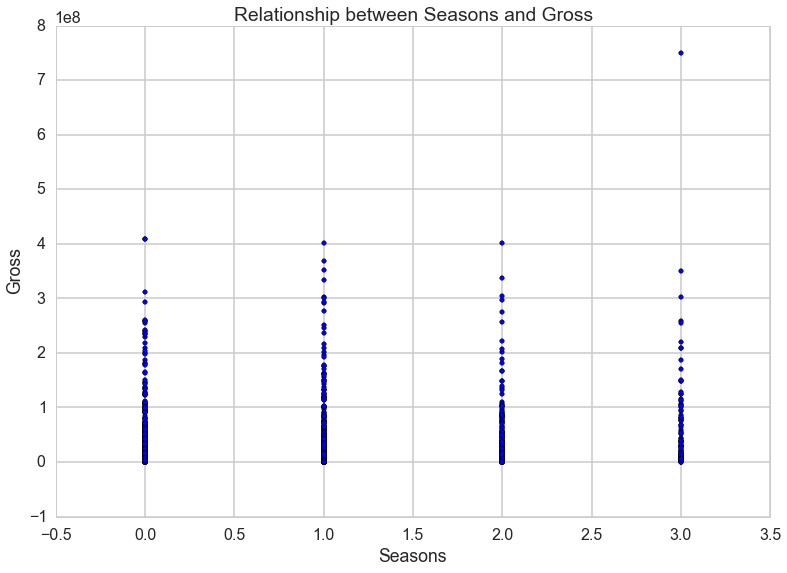

In [40]:
plt.scatter(limiteddf.season, limiteddf.gross)
plt.xlabel("Seasons")
plt.ylabel("Gross")
plt.title("Relationship between Seasons and Gross")

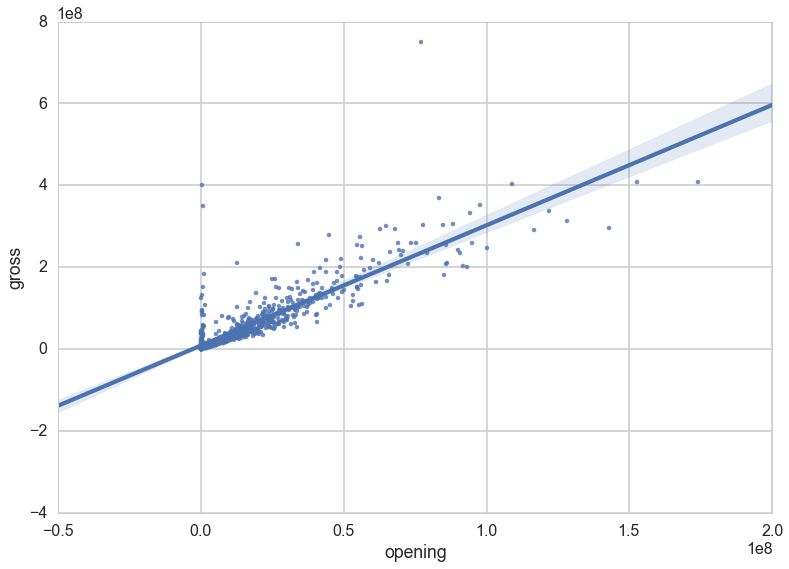

In [41]:
sns.regplot(y="gross", x="opening", data=limiteddf, fit_reg = True)

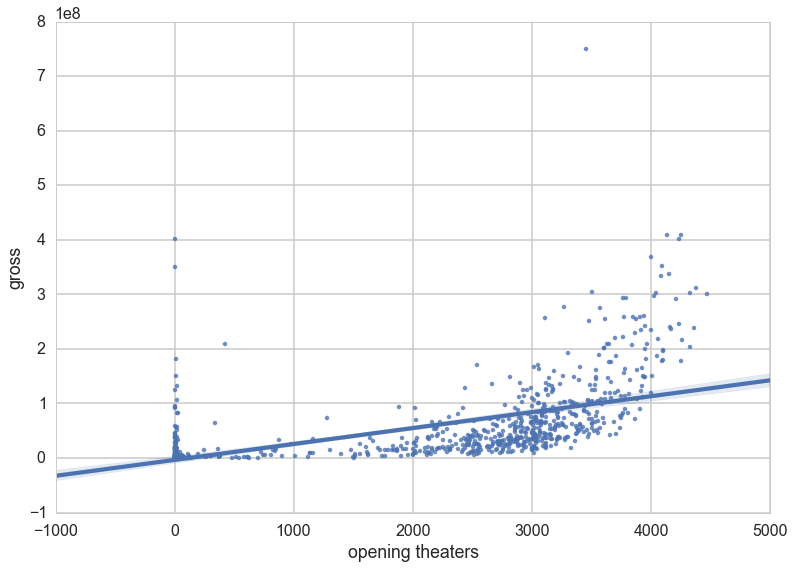

In [42]:
sns.regplot(y="gross", x="opening theaters", data=limiteddf, fit_reg = True)

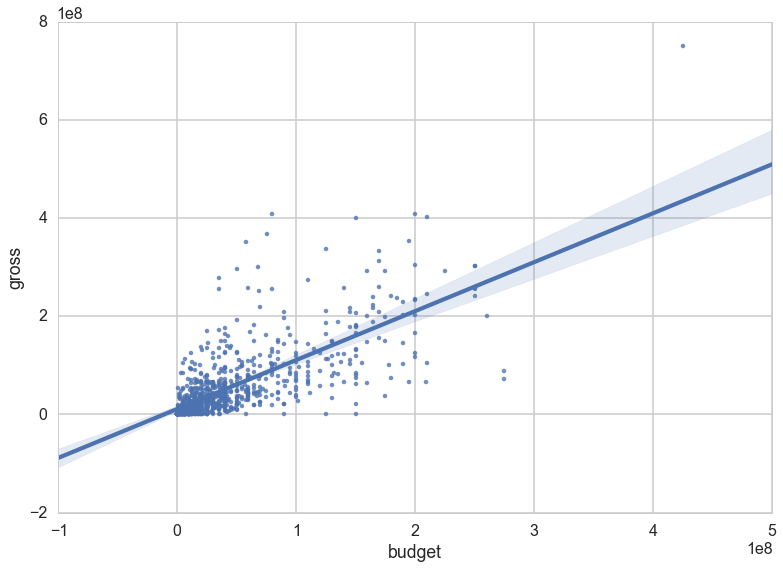

In [49]:
sns.regplot(y="gross", x="budget", data=limiteddf, fit_reg = True)

In [42]:
studiodf = limiteddf.groupby('studio') 

In [51]:
studioslist = studiodf['title'].count()

In [53]:
studioslist.sort(ascending=False)

In [60]:
if "Fox" in (studioslist[:2]):
    print "yes"

In [61]:
limiteddf['studio_main'] = 'Other'

/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [51]:
limiteddf.rename(columns={'opening theaters': 'opening_theaters', 'opening': 'opening_gross'}, inplace=True)

/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


#ACTUALLY running models
Notice the difference in models when we include opening_gross and when we do not. If we include opening_gross, the number of theaters actually hurts a movie (statistically significant), while when we do not include opening_gross, there is a strong positive relationship between the number of theaters and the final gross number.

However, the R^2 for the model with both is much higher (~0.8) rather than with just the opening theaters (~0.55)

In [57]:
from statsmodels.formula.api import ols
m = ols('gross ~ budget + opening_theaters + season',limiteddf).fit()
print m.summary()

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     198.9
Date:                Sat, 05 Dec 2015   Prob (F-statistic):          3.63e-138
Time:                        11:44:53   Log-Likelihood:                -15604.
No. Observations:                 815   AIC:                         3.122e+04
Df Residuals:                     809   BIC:                         3.125e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept        -1.237e+07   4.44e+06  

In [58]:
m2 = ols('gross ~ budget + opening_theaters + opening_gross + season',limiteddf).fit()
print m2.summary()

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     534.8
Date:                Sat, 05 Dec 2015   Prob (F-statistic):          2.16e-277
Time:                        11:44:53   Log-Likelihood:                -15277.
No. Observations:                 815   AIC:                         3.057e+04
Df Residuals:                     808   BIC:                         3.060e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept        -2.474e+06   2.99e+06  

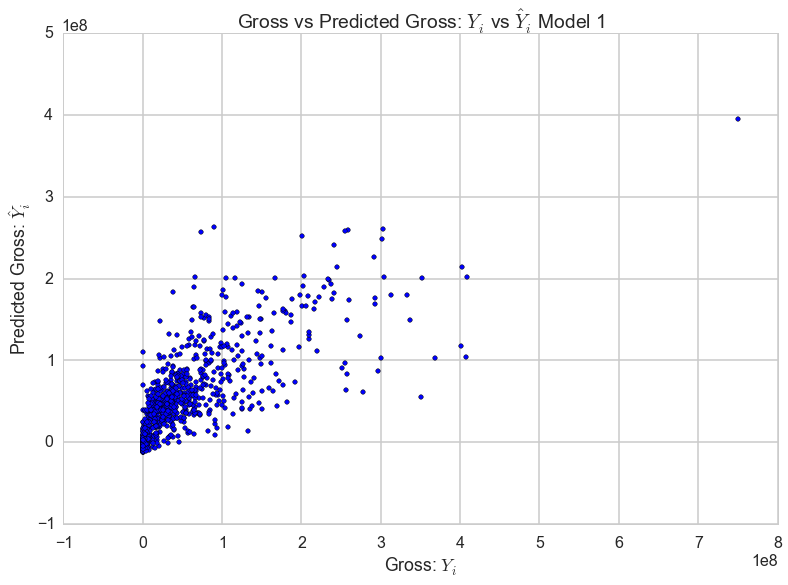

In [60]:
plt.scatter(limiteddf['gross'], m.fittedvalues)
plt.xlabel("Gross: $Y_i$")
plt.ylabel("Predicted Gross: $\hat{Y}_i$")
plt.title("Gross vs Predicted Gross: $Y_i$ vs $\hat{Y}_i$ Model 1")

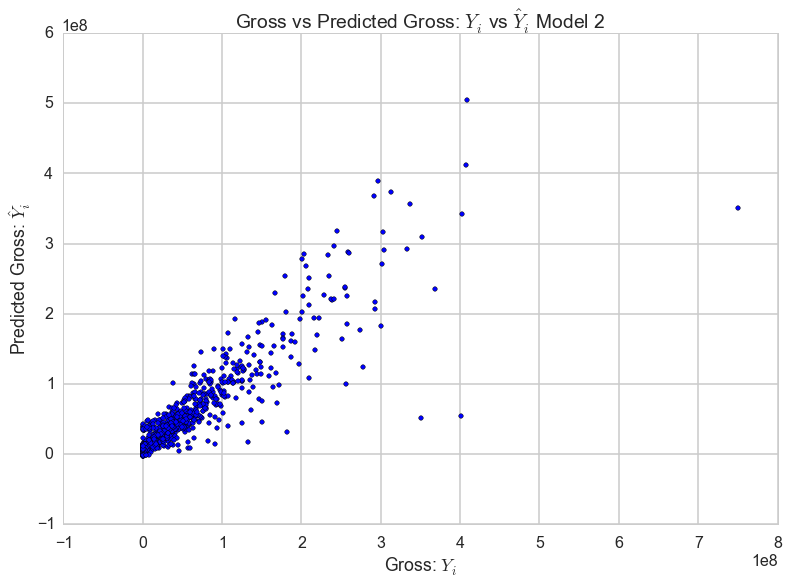

In [61]:
plt.scatter(limiteddf['gross'], m2.fittedvalues)
plt.xlabel("Gross: $Y_i$")
plt.ylabel("Predicted Gross: $\hat{Y}_i$")
plt.title("Gross vs Predicted Gross: $Y_i$ vs $\hat{Y}_i$ Model 2")

#Using SKlearn as an analysis alternative

In [63]:
from sklearn.linear_model import LinearRegression
X = limiteddf[['season', 'budget', 'opening_gross', 'opening_theaters']]

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
lm.fit(X, limiteddf.gross)
print 'Estimated intercept coefficient:', lm.intercept_
print 'Number of coefficients:', len(lm.coef_)
# The coefficients
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

Estimated intercept coefficient: -4002081.11907
Number of coefficients: 4


,features,estimatedCoefficients
0,season,9402725.302591
1,budget,0.308356
2,opening_gross,2.647457
3,opening_theaters,-3719.011156


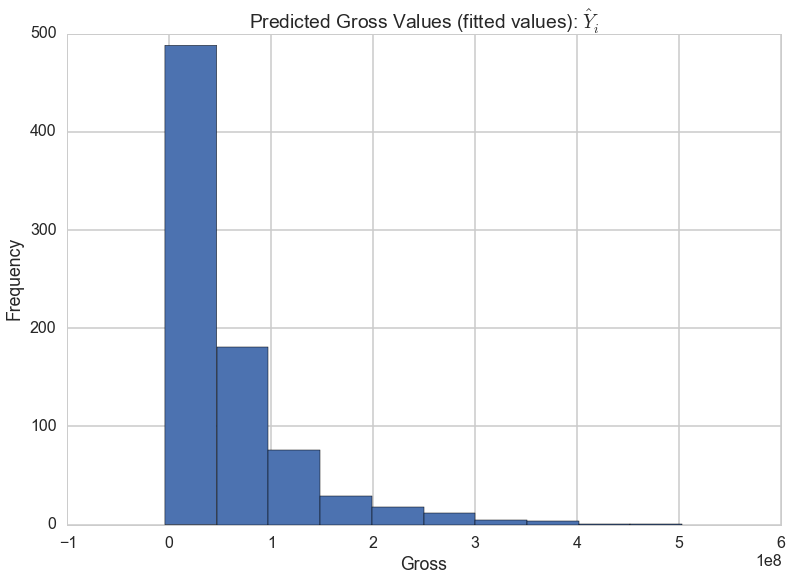

In [67]:
plt.hist(lm.predict(X))
plt.title('Predicted Gross Values (fitted values): $\hat{Y}_i$')
plt.xlabel('Gross')
plt.ylabel('Frequency')

#Creating a train/test set to determine MSE